# Theory of Deep Learning

We will start with why deep learning works and explain the basis of Universal Approximation

Let us take a non-linear function - a saddle function

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

## Create a Noisy Function

In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)

In [5]:
x

array([ -1.00000000e+01,  -9.90000000e+00,  -9.80000000e+00,
        -9.70000000e+00,  -9.60000000e+00,  -9.50000000e+00,
        -9.40000000e+00,  -9.30000000e+00,  -9.20000000e+00,
        -9.10000000e+00,  -9.00000000e+00,  -8.90000000e+00,
        -8.80000000e+00,  -8.70000000e+00,  -8.60000000e+00,
        -8.50000000e+00,  -8.40000000e+00,  -8.30000000e+00,
        -8.20000000e+00,  -8.10000000e+00,  -8.00000000e+00,
        -7.90000000e+00,  -7.80000000e+00,  -7.70000000e+00,
        -7.60000000e+00,  -7.50000000e+00,  -7.40000000e+00,
        -7.30000000e+00,  -7.20000000e+00,  -7.10000000e+00,
        -7.00000000e+00,  -6.90000000e+00,  -6.80000000e+00,
        -6.70000000e+00,  -6.60000000e+00,  -6.50000000e+00,
        -6.40000000e+00,  -6.30000000e+00,  -6.20000000e+00,
        -6.10000000e+00,  -6.00000000e+00,  -5.90000000e+00,
        -5.80000000e+00,  -5.70000000e+00,  -5.60000000e+00,
        -5.50000000e+00,  -5.40000000e+00,  -5.30000000e+00,
        -5.20000000e+00,

In [76]:
X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)

In [123]:
Z = 2*X*X - 3*Y*Y + 5*c + e

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [114]:
def plot3d(X,Y,Z):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color='y')
    plt.show()

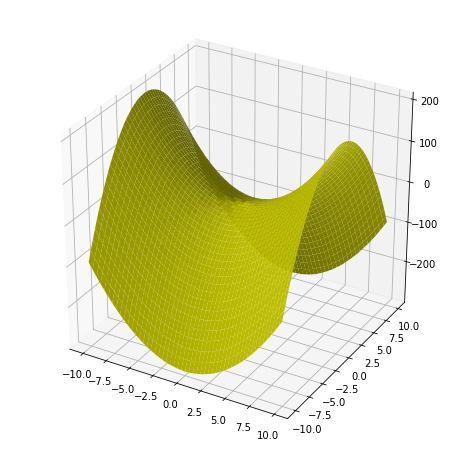

In [115]:
plot3d(X,Y,Z)

## Approximate using Neural Network

In [52]:
from keras.models import Sequential
from keras.layers import Dense

In [101]:
input_xy = np.c_[X.reshape(-1),Y.reshape(-1)]
output_z = Z.reshape(-1)

In [102]:
output_z.shape, input_xy.shape

((40000,), (40000, 2))

In [155]:
model = Sequential()
model.add(Dense(40, input_dim=2,  activation="relu"))
model.add(Dense(1))

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 40)                120       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 41        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.compile(loss='mse', optimizer="adam")

In [158]:
%time
history = model.fit(input_xy, output_z, batch_size=10, epochs=2, verbose=1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.3 µs
Epoch 1/2
40000/40000 [==============================] - 5s 135us/step - loss: 3779.0159
Epoch 2/2
40000/40000 [==============================] - 5s 128us/step - loss: 607.9532


In [159]:
Z_pred = model.predict(input_xy).reshape(200,200)

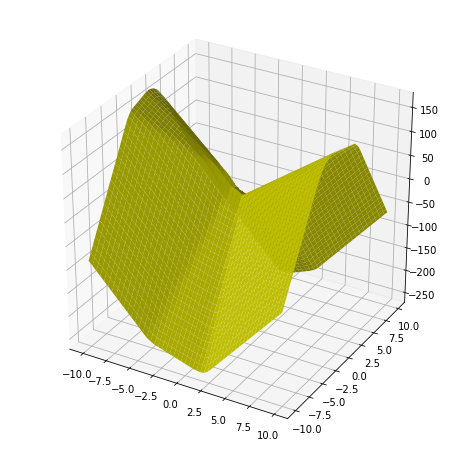

In [160]:
plot3d(X,Y,Z_pred)

Try changing the activation to a "linear" and see whether you can predict the function or not 